In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Probability (mass) vs probability density

**For discrete variables**, the probability ai the frequency at with an event occurs: an outcome with a probability of 0.4 happens roughly 4 out of 10 times (or 40/100, 400/1000, an so on).

**For continuous variables**, we compare the probability densities of different outcomes to know their relative probabilities: an outcome with a probability density of 0.4 happens twice as often as an outcome with a probability density of 0.2.

# Normal distribution

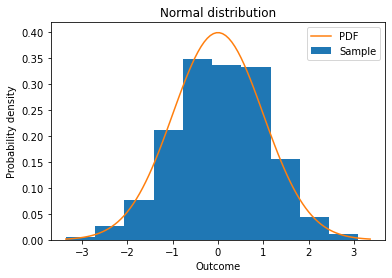

In [2]:
mu = 0    # Mean.
sigma = 1 # Standard deviation.
s = 1000  # Sample size.

normal_sample = stats.norm.rvs(mu, sigma, size = s)
lim = max(abs(normal_sample))   # Just for
z = np.linspace(-lim, lim, 100) # the plot.
normal_pdf = stats.norm.pdf(z, mu, sigma)

plt.hist(normal_sample, density=True)
plt.plot(z, normal_pdf)

plt.title('Normal distribution')
plt.xlabel('Outcome')
plt.ylabel('Probability density')
plt.legend(['PDF', 'Sample'])

plt.show()

In [3]:
# P(x <= 1.3)
stats.norm.cdf(1.3, mu, sigma)

0.9031995154143897

In [4]:
# Sum two normal distributions.
x = (2, 3) # mu, sigma.
y = (0, 2)

def sum_normals(x, y, xp=0.5, yp=0.5):
    mu = xp * x[0] + yp * y[0]
    sigma = xp**2 * x[1]**2 \
          + yp**2 * y[1]**2
    return (mu, sigma)

sum1 = sum_normals(x, y)
sum2 = sum_normals(x, y, 0.3, 0.7)
sum3 = sum_normals(x, y, 0.7, 0.3)

print(sum1, sum2, sum3)

(1.0, 3.25) (0.6, 2.7699999999999996) (1.4, 4.77)


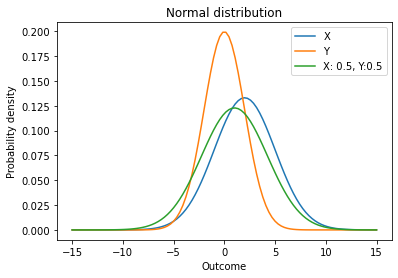

In [5]:
z = np.linspace(-15, 15, 100)

plt.plot(z, stats.norm.pdf(z, x[0], x[1]))
plt.plot(z, stats.norm.pdf(z, y[0], y[1]))
plt.plot(z, stats.norm.pdf(z, sum1[0], sum1[1]))
#plt.plot(z, stats.norm.pdf(z, sum2[0], sum2[1]))
#plt.plot(z, stats.norm.pdf(z, sum3[0], sum3[1]))

plt.title('Normal distribution')
plt.xlabel('Outcome')
plt.ylabel('Probability density')
plt.legend(['X', 'Y', 'X: 0.5, Y:0.5'])

plt.show()

### The standard deviation is not a percentage.

## Multivariate normal distribution
More than one normally distributed variable that may not be independent.

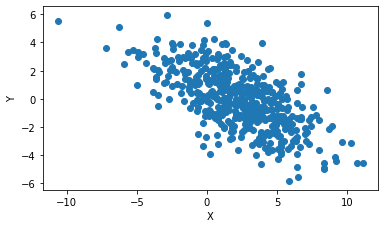

In [6]:
# Mu (as a vector) and Sigma (as a matrix) define a joint probability distribution.
Mu = np.array([2, 0])
Sigma = np.array([[3**2, -4], # Covariance matrix.
                  [-4, 2**2]])

x, y = np.random.multivariate_normal(Mu, Sigma, 500).T

plt.scatter(x, y)

plt.gca().set_aspect('equal')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [7]:
np.corrcoef(x, y)

array([[ 1.        , -0.65829428],
       [-0.65829428,  1.        ]])

In [8]:
print(x.mean())
print(y.mean())
print(x.std())
print(y.std())

2.1410579897084507
-0.031550533803477596
3.049496008063262
2.073529602633521


In [9]:
Mu = np.array([2, 0])
Sigma = np.array([[3**2, 4], # Covariance matrix.
                  [4, 2**2]])

def sum_mv_normals(Mu, Sigma, xp=0.5, yp=0.5):
    assert Sigma[0, 1] == Sigma[1, 0]
    
    mu = xp * Mu[0] + yp * Mu[1]
    sigma = xp**2 * Sigma[0, 0] \
          + yp**2 * Sigma[1, 1] \
          + 2 * xp * yp * Sigma[0, 1]
    return (mu, sigma)

sum1 = sum_mv_normals(Mu, Sigma)
sum2 = sum_mv_normals(Mu, Sigma, 0.3, 0.7)
sum3 = sum_mv_normals(Mu, Sigma, 0.7, 0.3)

print(sum1, sum2, sum3)

(1.0, 5.25) (0.6, 4.449999999999999) (1.4, 6.449999999999999)


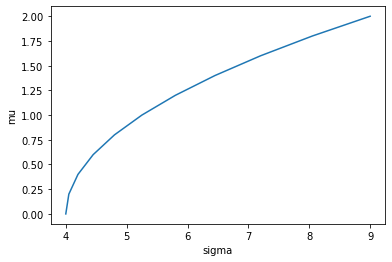

In [10]:
def mu_sigma_curve(Mu, Sigma, n=10):
    points = [sum_mv_normals(Mu, Sigma, xp=i / n, yp=1 - (i / n)) for i in range(n + 1)]
    return np.array(points).T
    
ms = mu_sigma_curve(Mu, Sigma)

plt.plot(ms[1], ms[0])

plt.xlabel('sigma')
plt.ylabel('mu')

plt.show()

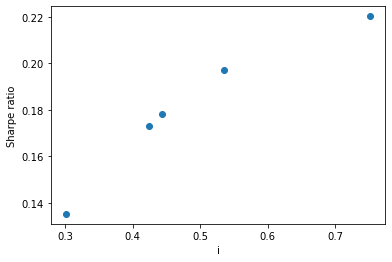

In [11]:
# Random search vs analytical methods.

def sharpe(Mu, Sigma, n=10):
    p = np.random.random(n)
    points = [sum_mv_normals(Mu, Sigma, xp=i, yp=1 - i) for i in p]
    mu, sigma = np.array(points).T
    sharpe = mu / sigma # Sharpe ratio.
    return sharpe, p

s = sharpe(Mu, Sigma, n=5)

plt.scatter(s[1], s[0])

plt.xlabel('i')
plt.ylabel('Sharpe ratio')

plt.show()

In [12]:
1 - 0.99**300

0.9509591059287142

# Bernoulli distribution
Coin toss. Yes/No question.

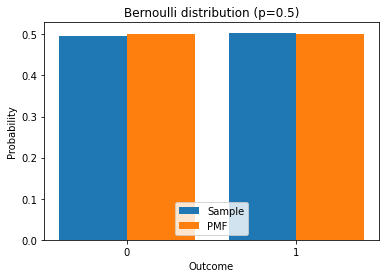

In [13]:
p = 0.5  # Probability of "success".
s = 1000 # Sample size.

x = stats.bernoulli.rvs(p, size = s)
bernoulli_sample = pd.Series(x).value_counts() / s
bernoulli_pmf = stats.bernoulli.pmf(1, p)

width = 0.4
plt.bar(bernoulli_sample.index - width / 2, bernoulli_sample, width=width)
plt.bar(pd.Series([0, 1]) + width / 2, bernoulli_pmf, width=width)
plt.xticks([0, 1])

plt.title('Bernoulli distribution (p=%.1f)' % p)
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.legend(['Sample', 'PMF'], loc='lower center')

plt.show()

# Binomial distribution
Number of "successes" in a series of Bernoulli trials. Non-negative.

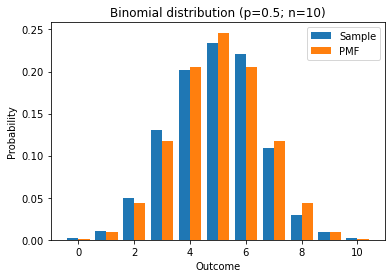

In [14]:
p = 0.5  # Probability of "success".
n = 10   # Number of trials per sample.
s = 1000 # Sample size.

x = stats.binom.rvs(n, p, size = s)
binom_sample = pd.Series(x).value_counts() / s
binom_pmf = stats.binom.pmf(range(n + 1), n, p)

width = 0.4
plt.bar(binom_sample.index - width / 2, binom_sample, width=width)
plt.bar(np.arange(n + 1) + width / 2, binom_pmf, width=width)
plt.xlim([-1, n + 1])

plt.title('Binomial distribution (p=%.1f; n=%d)' % (p, n))
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.legend(['Sample', 'PMF'])

plt.show()

# Poisson distribution
Counts how many times something happened, when this something happens at a rate given by an exponential distribution. Non-negative.

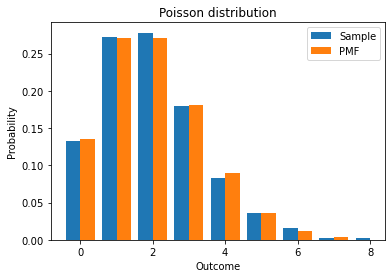

In [15]:
mu = 2   # Mean and variance (usually called lambda).
s = 1000 # Sample size.

x = stats.poisson.rvs(mu, size=s)
poisson_sample = pd.Series(x).value_counts() / s
poisson_pmf = stats.poisson.pmf(np.arange(max(poisson_sample.index)), mu)

width = 0.4
plt.bar(poisson_sample.index - width / 2, poisson_sample, width=width)
plt.bar(np.arange(max(poisson_sample.index)) + width / 2, poisson_pmf, width=width)

plt.title('Poisson distribution')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.legend(['Sample', 'PMF'])

plt.show()

# Exponential distribution
Counts time between events that happen at a constant average rate. Non-negative.

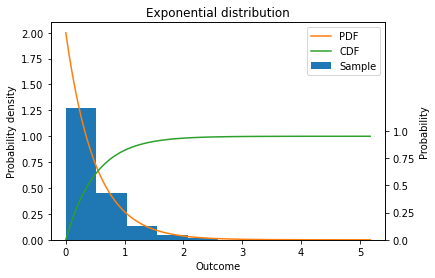

In [16]:
scale = 1 / 2 # Inverse rate (scale = 1 / lambda).
s = 1000      # Sample size.

exponential_sample = stats.expon.rvs(scale=scale, size = s)
x = np.linspace(0, max(exponential_sample), 100) # Just for the plot.
exponential_pdf = stats.expon.pdf(x, scale=scale)
exponential_cdf = stats.expon.cdf(x, scale=scale)

fig, ax1 = plt.subplots()
plt.hist(exponential_sample, density=True)
plt.plot(x, exponential_pdf)
plt.plot(x, exponential_cdf)

plt.title('Exponential distribution')
plt.xlabel('Outcome')
plt.ylabel('Probability density')
plt.legend(['PDF', 'CDF', 'Sample'])
ax2 = ax1.twinx()
ax2.set_yticks(np.linspace(0, 0.5, 5))
ax2.set_yticklabels(np.linspace(0, 1, 5))
ax2.set_ylabel('Probability')

plt.show()

# Geometric distribution
Counts the number of Bernoulli trials that happen before the first success. Non-negative.

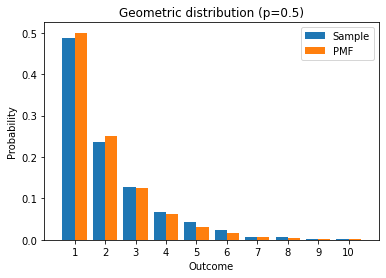

In [17]:
p = 0.5  # Probability of "success".
s = 1000 # Sample size.

k = 10 # Number of outcomes to show.

x = stats.geom.rvs(p, size = s)
geom_sample = pd.Series(x).value_counts() / s
geom_sample = geom_sample.loc[geom_sample.index <= k]
geom_pmf = stats.geom.pmf(range(k + 1), p)

width = 0.4
plt.bar(geom_sample.index - width / 2, geom_sample, width=width)
plt.bar(np.arange(k + 1) + width / 2, geom_pmf, width=width)
plt.xlim([0, k + 1])

plt.xticks(np.arange(k) + 1)
plt.title('Geometric distribution (p=%.1f)' % p)
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.legend(['Sample', 'PMF'])

plt.show()

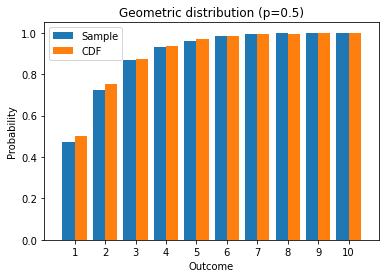

In [18]:
x = stats.geom.rvs(p, size = s)
geom_sample = np.cumsum(pd.Series(x).value_counts().sort_index() / s)
geom_sample = geom_sample.loc[geom_sample.index <= k]
geom_cdf = stats.geom.cdf(range(k + 1), p)

width = 0.4
plt.bar(geom_sample.index - width / 2, geom_sample, width=width)
plt.bar(np.arange(k + 1) + width / 2, geom_cdf, width=width)
plt.xlim([0, k + 1])

plt.xticks(np.arange(k) + 1)
plt.title('Geometric distribution (p=%.1f)' % p)
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.legend(['Sample', 'CDF'])

plt.show()

# Lognormal distribution
A distribution whose log has a normal distribution. Strictly positive.

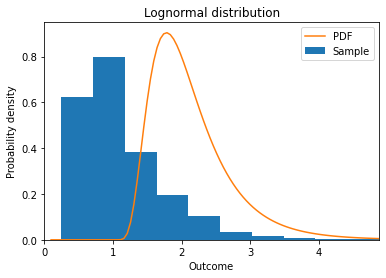

In [19]:
mu = 0      # Mean.
sigma = 0.5 # Standard deviation.
s = 1000    # Sample size.

normal_sample = stats.norm.rvs(mu, sigma, size = s)
lognormal_sample = np.exp(normal_sample)

#lognormal_sample = stats.lognorm.rvs(sigma, np.exp(mu), size = s)
lim = max(lognormal_sample)    # Just for
z = np.linspace(0.1, lim, 100) # the plot.
lognormal_pdf = stats.lognorm.pdf(z, sigma, np.exp(mu))

plt.hist(lognormal_sample, density=True)
plt.plot(z, lognormal_pdf)
plt.xlim([0, lim])

plt.title('Lognormal distribution')
plt.xlabel('Outcome')
plt.ylabel('Probability density')
plt.legend(['PDF', 'Sample'])

plt.show()